### Case Study 7 : Monetary loss 

Submitted by:

- Ravi Sivaraman
- Balaji Avvaru
- Apurv Mittal

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from IPython.display import display
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from time import time
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn import metrics as mt
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import  accuracy_score
warnings.filterwarnings('ignore')

In [2]:
# load data
df = pd.read_csv('final_project.csv') # read in the csv file

In [3]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [5]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


##### Missing value analysis

In [6]:
# Validate null values in the csv file
df.isnull().sum().sum()

1608

There are 1608 observations having missing values.

In [7]:
pd.set_option('display.max_rows', 100)
# Validate null values in the csv file
print((df.isnull().sum()).sort_values(ascending=False))
# print columns with null values
missing_data_columns = df.columns[df.isnull().any()]
print("\n\nColumns with null values")
print("************************")
missing_data_columns

x23    47
x10    43
x34    41
x33    41
x44    40
x18    40
x41    40
x31    39
x20    38
x2     38
x43    37
x3     37
x47    37
x5     37
x12    36
x26    36
x40    36
x15    35
x28    35
x19    35
x14    34
x48    32
x49    32
x38    31
x13    31
x46    31
x32    31
x11    30
x27    30
x35    30
x29    30
x30    30
x9     30
x45    29
x21    29
x24    28
x36    27
x22    27
x17    27
x7     27
x42    26
x16    26
x6     26
x4     26
x0     26
x1     25
x37    23
x39    23
x25    22
x8     21
y       0
dtype: int64


Columns with null values
************************


Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49'],
      dtype='object')

In [8]:
# percentage of missing values in each variable
(df[missing_data_columns].isnull().sum()/len(df)*100).sort_values(ascending=False)

x23    0.029375
x10    0.026875
x34    0.025625
x33    0.025625
x18    0.025000
x44    0.025000
x41    0.025000
x31    0.024375
x20    0.023750
x2     0.023750
x3     0.023125
x43    0.023125
x5     0.023125
x47    0.023125
x26    0.022500
x40    0.022500
x12    0.022500
x28    0.021875
x15    0.021875
x19    0.021875
x14    0.021250
x48    0.020000
x49    0.020000
x13    0.019375
x46    0.019375
x38    0.019375
x32    0.019375
x27    0.018750
x29    0.018750
x30    0.018750
x9     0.018750
x11    0.018750
x35    0.018750
x21    0.018125
x45    0.018125
x24    0.017500
x17    0.016875
x7     0.016875
x36    0.016875
x22    0.016875
x42    0.016250
x0     0.016250
x16    0.016250
x6     0.016250
x4     0.016250
x1     0.015625
x39    0.014375
x37    0.014375
x25    0.013750
x8     0.013125
dtype: float64

The percentage of missing values for each feature is less than 0.5 perentage. Since missing values are in multiple features, removing the observations with missing values.

In [9]:
# remove rows with any feature missing values
df.dropna(axis=0, inplace=True)

In [10]:
df.isnull().sum().sum()

0

#### Target

In [11]:
df['y'].value_counts()

0    94846
1    63546
Name: y, dtype: int64

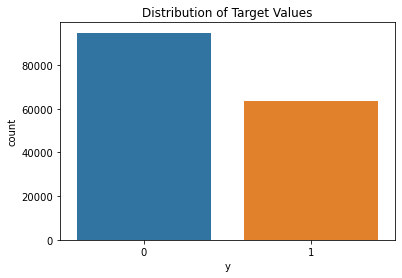

In [12]:
sns.countplot(x = "y", data = df)
plt.title("Distribution of Target Values")
plt.show()

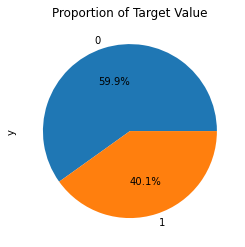

In [13]:
# Pie chart
df['y'].value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

Target variable is not perfectly balanced, majority class is "0" with 60% of the data and minority class is "1" with 40%.

##### Independent Variable analysis

In [14]:
# features of type "object"
df.select_dtypes(include=['object'])

,x24,x29,x30,x32,x37
0,euorpe,July,tuesday,0.0%,$1313.96
1,asia,Aug,wednesday,-0.02%,$1962.78
2,asia,July,wednesday,-0.01%,$430.47
3,asia,July,wednesday,0.01%,$-2366.29
4,asia,July,tuesday,0.01%,$-620.66
...,...,...,...,...,...
159995,asia,Aug,wednesday,0.0%,$-891.96
159996,asia,May,wednesday,-0.01%,$1588.65
159997,asia,Jun,wednesday,-0.0%,$687.46
159998,asia,May,wednesday,-0.02%,$439.21


#### Feature x32

Feature x32 is of type "object" which contains % character which mean this feature represents the percentage of the values. Remove the % from all observations.

In [15]:
df['x32'].value_counts()

0.01%     40367
-0.01%    33771
0.0%      33556
-0.0%     30224
-0.02%     9812
0.02%      7911
-0.03%     1709
0.03%       845
-0.04%      136
0.04%        54
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [16]:
# remove % from Feature x32
df['x32'] = [float(x.replace('%','')) for x in df['x32']]

In [17]:
df['x32'].value_counts()

 0.00    63780
 0.01    40367
-0.01    33771
-0.02     9812
 0.02     7911
-0.03     1709
 0.03      845
-0.04      136
 0.04       54
-0.05        6
 0.05        1
Name: x32, dtype: int64

#### Feature x37

Feature x37 is of type "object" which contains $ character which mean this feature represents amounts. Remove the $ from all observations.

In [18]:
# Feature x37
df['x37'].value_counts()

$-311.26     6
$-336.77     6
$341.26      6
$237.4       6
$72.42       6
            ..
$-1224.72    1
$-877.58     1
$654.87      1
$-203.89     1
$-1229.34    1
Name: x37, Length: 128126, dtype: int64

In [19]:
df['x37'] = [float(x.replace('$','')) for x in df['x37']]

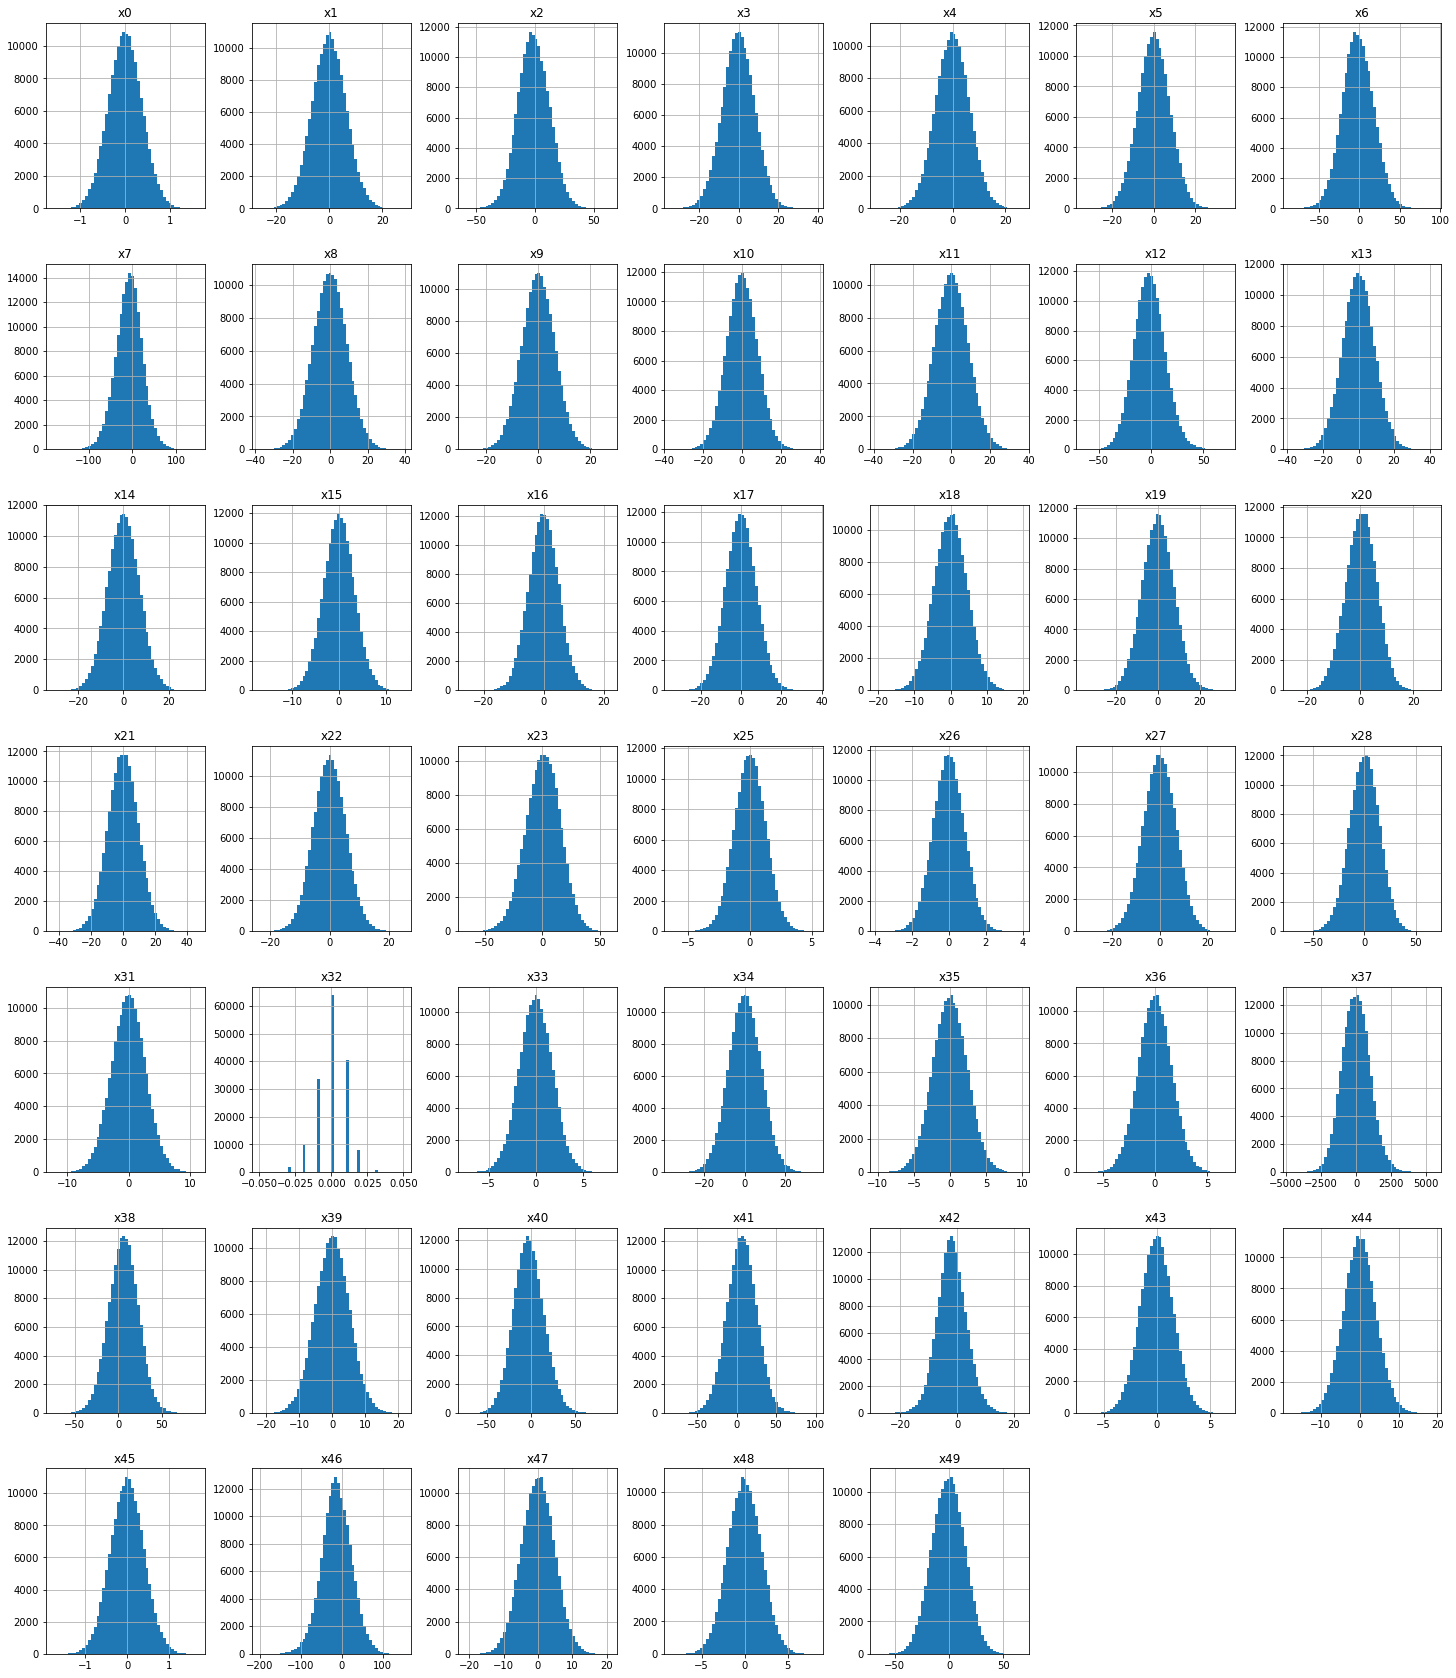

In [20]:
#Visualizing the hist of data to check normality of independent variable
df_X = df.drop(['y'],axis=1)
df_X.hist(bins=50,figsize=(25,30))
plt.show()

In [21]:
df.drop(['y'],axis=1).describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,...,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,-1.148314,-0.023012,-0.000266,0.013282,-1.669562,-7.697877,-0.028853,0.004320,...,-2.318750,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052
std,0.371064,6.340297,13.274738,8.066624,6.383306,7.672102,19.300472,30.541562,8.904048,6.354359,...,17.040216,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134
min,-1.592635,-26.278302,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.251246,-4.259016,-10.166609,-5.453044,-4.313987,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,...,-13.952620,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046
50%,-0.001818,0.010023,-1.342199,-0.028470,-0.001138,0.015135,-1.951457,-6.959275,-0.016173,0.003098,...,-2.709284,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139
75%,0.248622,4.286606,7.878130,5.448332,4.308644,5.191172,11.454209,12.215119,5.978646,4.303807,...,8.972837,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,88.824477,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604


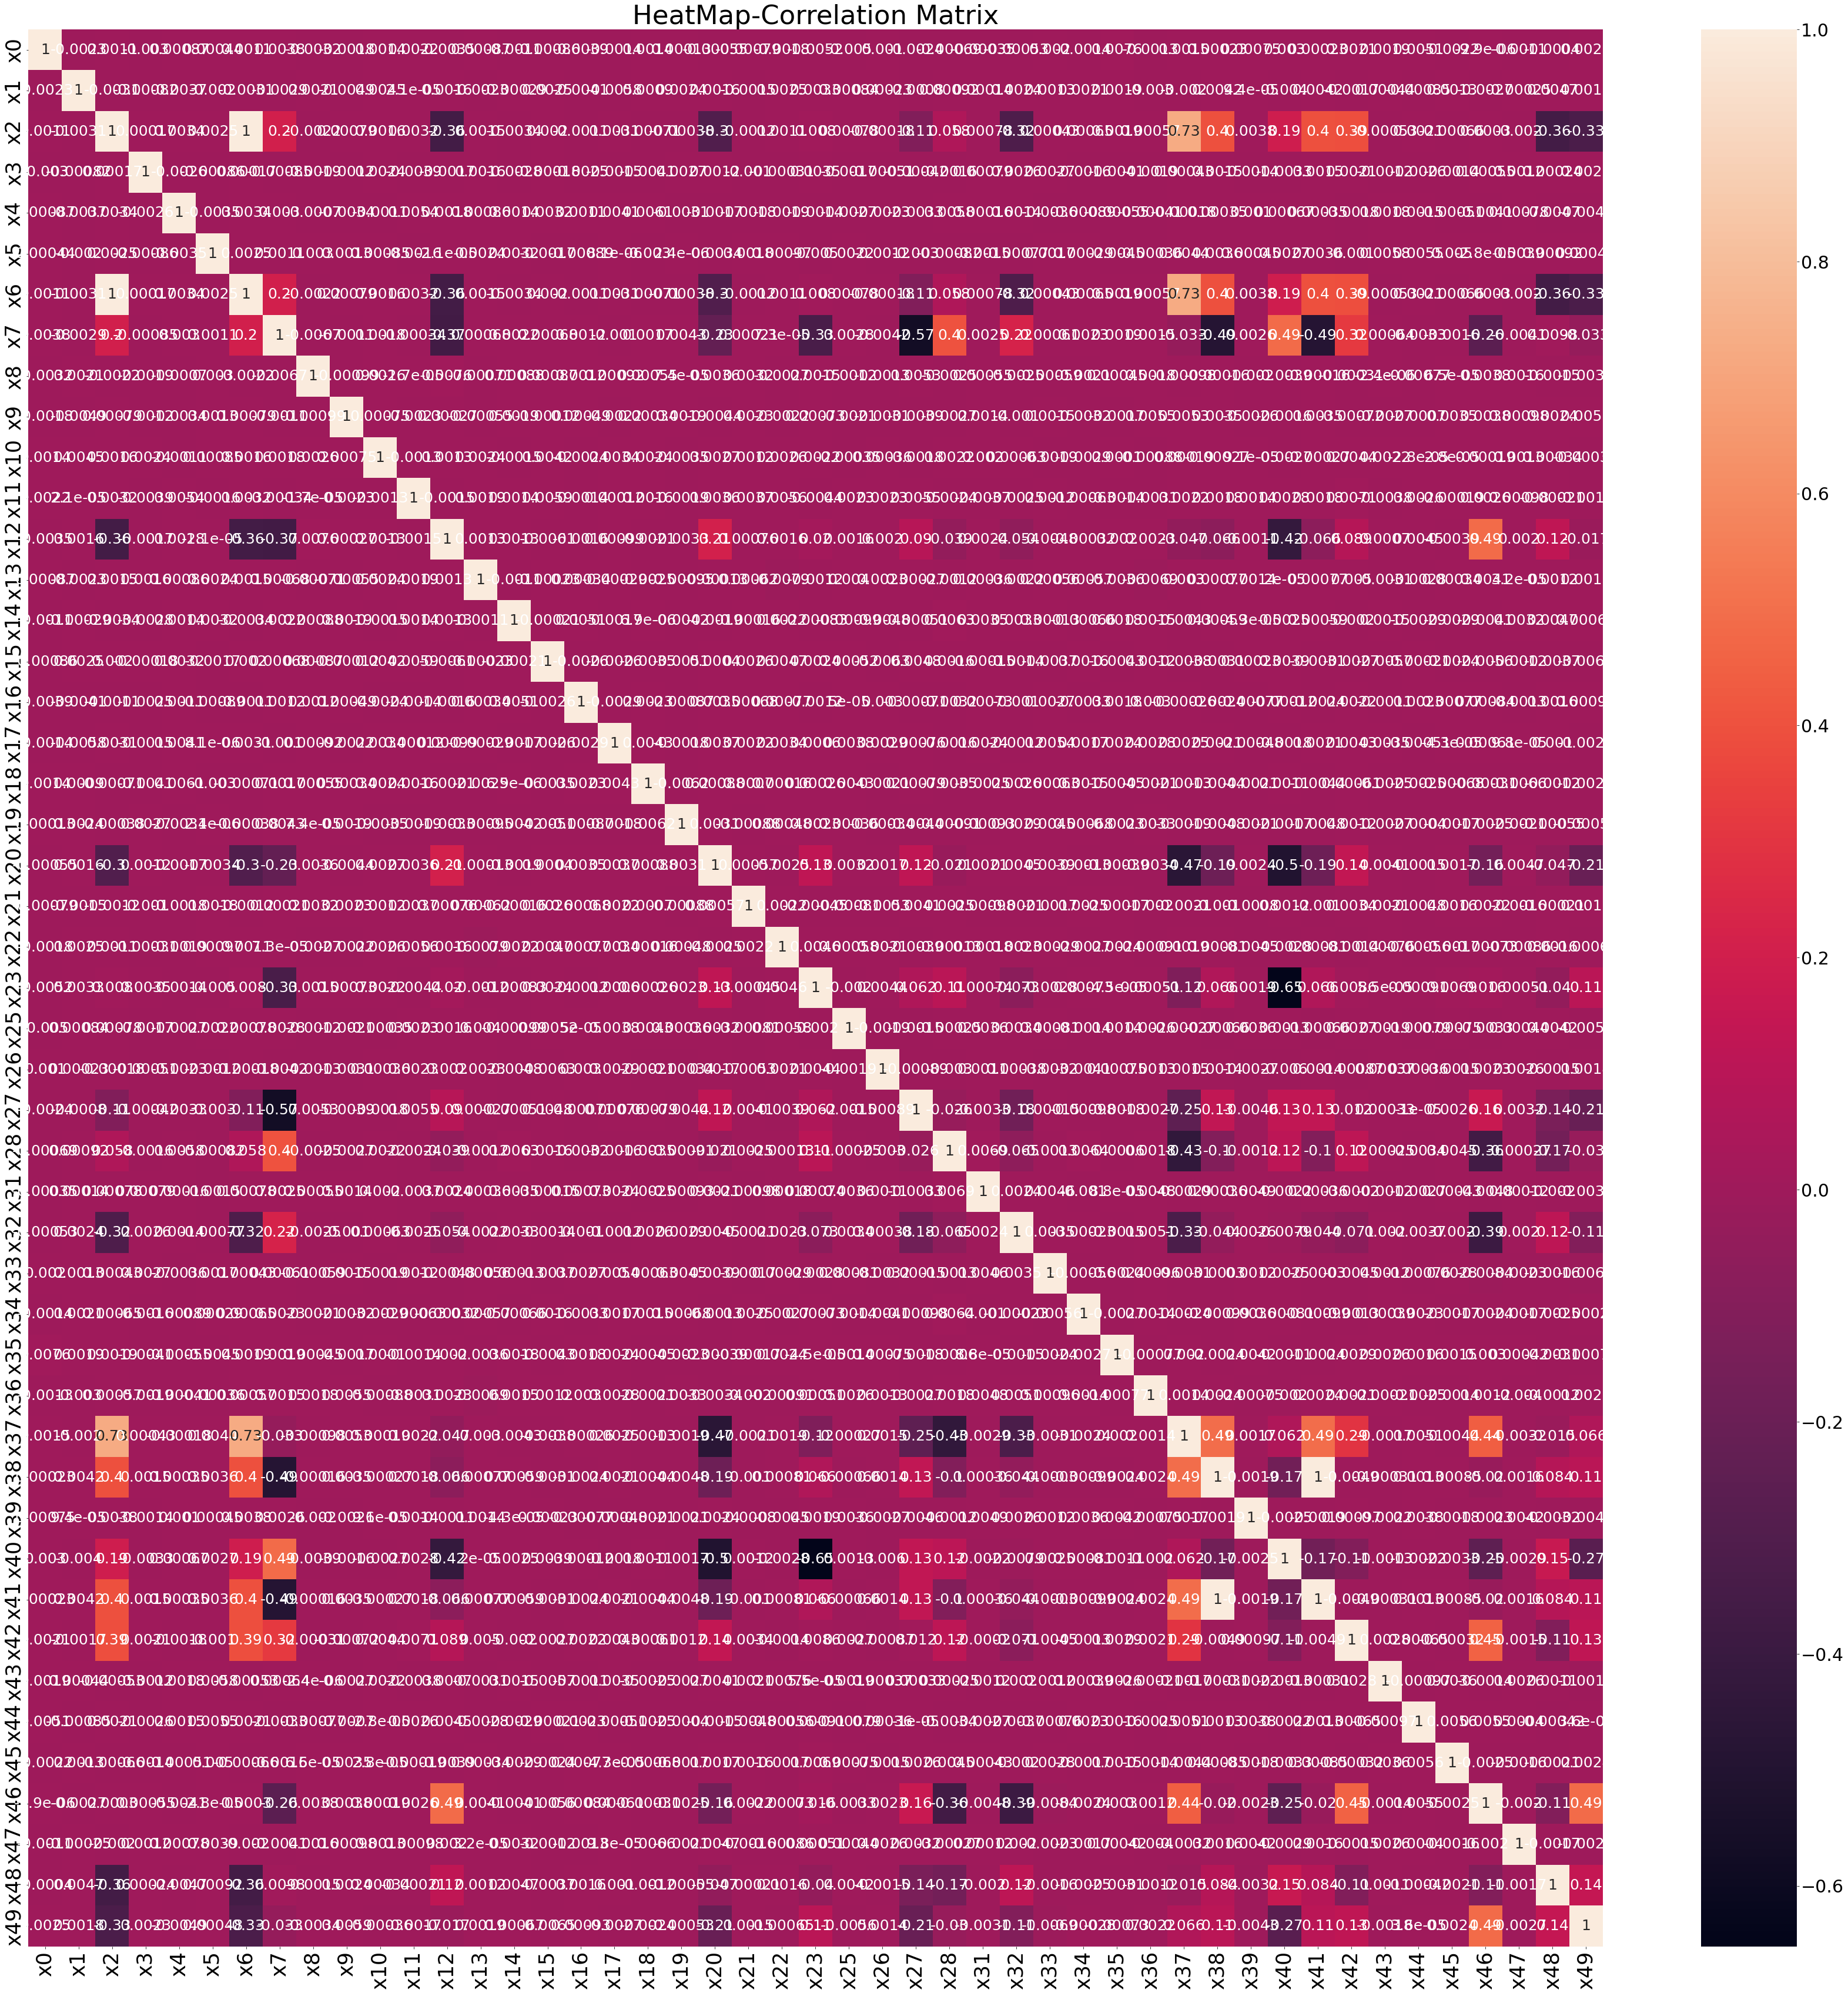

In [22]:
#heatmap - correlation matrix
plt.figure(figsize=(60, 60)) #code reference (5-1)
plt.xticks(rotation=90,fontsize = 35)
plt.yticks(rotation=180, fontsize = 35)
ax=sns.heatmap(df_X.corr(), annot=True, cbar=True, annot_kws={"size":25})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
plt.title('HeatMap-Correlation Matrix',fontsize = 45)
plt.show()

##### Check for Multicolliniarity 

In [23]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
# to drop features with colliniarity more than 95%
pd.set_option('display.max_rows', 100)

corr_df = pd.DataFrame(df_X.corr().abs())
corr_df.head(100)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
x0,1.000000,0.002259,0.001064,0.003013,0.000869,0.000440,0.001064,0.003823,0.003216,0.001781,...,0.002972,0.000231,0.002129,0.001939,0.005078,0.002239,0.000010,0.001135,0.000396,0.002459
x1,0.002259,1.000000,0.003127,0.000819,0.003739,0.001967,0.003127,0.002948,0.002095,0.004921,...,0.003958,0.004229,0.001727,0.000441,0.000846,0.001298,0.002655,0.000249,0.004673,0.001824
x2,0.001064,0.003127,1.000000,0.000166,0.003391,0.002507,1.000000,0.203480,0.002174,0.000791,...,0.187044,0.395047,0.390446,0.000527,0.002064,0.000664,0.000301,0.001969,0.356168,0.325098
x3,0.003013,0.000819,0.000166,1.000000,0.002577,0.000860,0.000166,0.000853,0.001865,0.001242,...,0.003312,0.001531,0.002135,0.001179,0.002602,0.001418,0.000552,0.001193,0.000237,0.002326
x4,0.000869,0.003739,0.003391,0.002577,1.000000,0.003471,0.003391,0.002959,0.000700,0.003439,...,0.000671,0.000346,0.001772,0.001782,0.001532,0.000509,0.004114,0.000782,0.004667,0.004894
x5,0.000440,0.001967,0.002507,0.000860,0.003471,1.000000,0.002507,0.001091,0.002993,0.001279,...,0.002717,0.003622,0.001024,0.005835,0.005527,0.005021,0.000028,0.003900,0.000916,0.000484
x6,0.001064,0.003127,1.000000,0.000166,0.003391,0.002507,1.000000,0.203480,0.002174,0.000791,...,0.187044,0.395047,0.390446,0.000527,0.002064,0.000664,0.000301,0.001969,0.356168,0.325098
x7,0.003823,0.002948,0.203480,0.000853,0.002959,0.001091,0.203480,1.000000,0.006701,0.001115,...,0.489754,0.486476,0.320051,0.000644,0.003307,0.001622,0.264795,0.004142,0.009838,0.032725
x8,0.003216,0.002095,0.002174,0.001865,0.000700,0.002993,0.002174,0.006701,1.000000,0.000994,...,0.003901,0.000163,0.000311,0.000002,0.000766,0.000065,0.003776,0.001637,0.001525,0.003422
x9,0.001781,0.004921,0.000791,0.001242,0.003439,0.001279,0.000791,0.001115,0.000994,1.000000,...,0.001607,0.003527,0.000717,0.002679,0.000695,0.003547,0.003773,0.000980,0.002428,0.005917


In [24]:
# Multi Colliniarity analysis on Independent variables 
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape),k=1).astype(np.bool))
print(upper_tri)

     x0        x1        x2        x3        x4        x5        x6        x7  \
x0  NaN  0.002259  0.001064  0.003013  0.000869  0.000440  0.001064  0.003823   
x1  NaN       NaN  0.003127  0.000819  0.003739  0.001967  0.003127  0.002948   
x2  NaN       NaN       NaN  0.000166  0.003391  0.002507  1.000000  0.203480   
x3  NaN       NaN       NaN       NaN  0.002577  0.000860  0.000166  0.000853   
x4  NaN       NaN       NaN       NaN       NaN  0.003471  0.003391  0.002959   
x5  NaN       NaN       NaN       NaN       NaN       NaN  0.002507  0.001091   
x6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.203480   
x7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
x8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
x9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
x10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
x11 NaN       NaN       NaN 

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
print((to_drop))

['x6', 'x41']


In [26]:
df = pd.get_dummies(df, columns=['x24', 'x29', 'x30'], prefix=['x24', 'x29', 'x30'])

In [27]:
X = df.drop(['y'],axis=1)
ind_columns = df.drop('y',axis=1).columns
y = df['y']

We did normalize the attributes using StandardScaler() to scale them between 0 and 1 before running models.

In [28]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split
#Direct train/test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.20, stratify=y, random_state=1234
)

In [30]:
#Create Cross Validation Procedure
cv = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

### Model Building

##### Helper Function

In [31]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
    #fmt = '.2f''d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#### Logistic Regression

In [32]:
LR = LogisticRegression()

# define parameters
#penalty_LR = ['l1', 'l2', 'elasticnet', 'none'] 
penalty_LR = [ 'l1', 'l2'] 
C_LR = [0.001, 0.01, 0.1, 1, 10, 100, 1000]  
#C_LR = [0.001,10, 100]  
max_iter_LR = [500]
#max_iter_LR = [500]
class_weight_LR = ['balanced']
#solver_LR = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
solver_LR = ['lbfgs', 'liblinear']

# define random search
param_random_LR = dict(penalty=penalty_LR, C=C_LR, max_iter=max_iter_LR, class_weight=class_weight_LR, solver=solver_LR)


search_LR = RandomizedSearchCV(estimator=LR, param_distributions=param_random_LR, n_jobs=3, cv=cv, 
                               scoring='accuracy',n_iter=20, verbose=5)

In [33]:
%%time
result_LR = search_LR.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (result_LR.best_score_, result_LR.best_params_))
means = result_LR.cv_results_['mean_test_score']
stds = result_LR.cv_results_['std_test_score']
params = result_LR.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: 0.708175 using {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.1}
0.708144 (0.003505) with: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1000}
0.708144 (0.003517) with: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1000}
0.708144 (0.003535) with: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'class_weight': 'balanced', 'C': 1}
0.708057 (0.003511) with: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.01}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter': 500, 'class_weight': 'balanced', 'C': 100}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'l1', 'max_iter': 500, 'class_weight': 'balanced', 'C': 10}
nan (nan) with: {'

In [34]:
# # The GridSearch algorithm determined the following optimal parameters
best_Estimator_LR =result_LR.best_estimator_
best_Estimator_LR

LogisticRegression(C=0.1, class_weight='balanced', max_iter=500)

In [35]:
y_pred = best_Estimator_LR.predict(X_test)
accuracy_score(y_pred, Y_test)

0.710596925407999

In [36]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     18970
           1       0.63      0.68      0.65     12709

    accuracy                           0.71     31679
   macro avg       0.70      0.71      0.70     31679
weighted avg       0.72      0.71      0.71     31679



[[13882  5088]
 [ 4080  8629]]


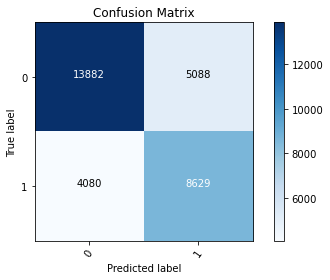

In [37]:
cm = confusion_matrix(Y_test, y_pred)

cm_plot_label =[0, 1]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Matrix')

#### Monetary loss

- False Positive or classifying the data as true when its false costs the client 100 dollars 
- False Negative or classifying the data as false when it is true costs the client 250 dollars

In [38]:
total_nn = Y_test.count()
loss_nn = 100 * cm[0,1] +  250 * cm[1,0]
loss_nn

print(" Cost per prediction: $", loss_nn/total_nn )

 Cost per prediction: $ 48.259099087723726


#### Random Forest 

In [39]:
RF = RandomForestClassifier()

# define parameters       
max_depth_RF = [5, 7, 8, 10, 12]
random_state_RF = [1234]
n_estimators_RF =  [100]
criterion_RF = ['entropy']
min_samples_leaf_RF = [3, 4, 5]
min_samples_split_RF = [8, 10, 12]
class_weight_RF = ['balanced']

# define random search
param_random_RF = dict(n_estimators=n_estimators_RF, max_depth=max_depth_RF, random_state=random_state_RF,
                     criterion=criterion_RF, min_samples_leaf=min_samples_leaf_RF,
                    min_samples_split=min_samples_split_RF, class_weight=class_weight_RF)


search_RF = RandomizedSearchCV(estimator=RF, param_distributions=param_random_RF, n_jobs=3, cv=cv, 
                               scoring='accuracy',n_iter=20, verbose=5)

In [40]:
%%time
result_RF = search_RF.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (result_RF.best_score_, result_RF.best_params_))
means = result_RF.cv_results_['mean_test_score']
stds = result_RF.cv_results_['std_test_score']
params = result_RF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best: 0.894147 using {'random_state': 1234, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 12, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.827271 (0.004393) with: {'random_state': 1234, 'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.874425 (0.004781) with: {'random_state': 1234, 'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.827918 (0.003573) with: {'random_state': 1234, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.827918 (0.003573) with: {'random_state': 1234, 'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': 'balanced'}
0.846401 (0

In [41]:
# # The GridSearch algorithm determined the following optimal parameters
best_Estimator_RF =result_RF.best_estimator_
Coef_weights_RF = result_RF.best_estimator_.feature_importances_
best_Estimator_RF

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12, min_samples_leaf=3, min_samples_split=10,
                       random_state=1234)

In [42]:
y_pred = best_Estimator_RF.predict(X_test)
accuracy_score(y_pred, Y_test)

0.8930521796773888

In [43]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     18970
           1       0.86      0.88      0.87     12709

    accuracy                           0.89     31679
   macro avg       0.89      0.89      0.89     31679
weighted avg       0.89      0.89      0.89     31679



[[17163  1807]
 [ 1581 11128]]


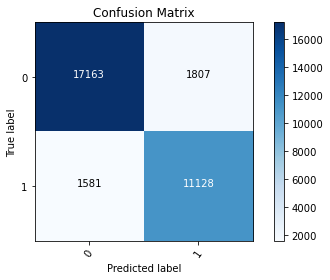

In [44]:
cm = confusion_matrix(Y_test, y_pred)

cm_plot_label =[0, 1]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Matrix')

#### Monetary loss

- False Positive or classifying the data as true when its false costs the client 100 dollars 
- False Negative or classifying the data as false when it is true costs the client 250 dollars

In [45]:
total_nn = Y_test.count()
loss_nn = 100 * cm[0,1] +  250 * cm[1,0]
loss_nn

print(" Cost per prediction: $", loss_nn/total_nn )

 Cost per prediction: $ 18.180813788314026


#### XG BOOST

In [46]:
XGB = xgb.XGBClassifier()

# define parameters       
clf_n_estimators_XGB = [100]
clf_learning_rate_XGB =  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]	 
clf_max_depth_XGB = range(3, 15)						 
clf_colsample_bytree_XFB = [i/10.0 for i in range(1, 3)]		 
clf_gamma_XGB = [0.01, 0.05, 0.1, 0.2, 0.3]				 
lambda_XGB = [0.01, 0.05, 0.1, 1.0, 5.0, 10.0, 50.0, 100.0]		 
min_child_weight = [0.1, 0.9, 0.95, 2, 3]	
random_state_XGB = [1234]

# define random search
param_random_XGB = dict(n_estimators=clf_n_estimators_XGB, learning_rate=clf_learning_rate_XGB, 
                     max_depth=clf_max_depth_XGB, colsample_bytree = clf_colsample_bytree_XFB,
                    gamma=clf_gamma_XGB, reg_lambda=lambda_XGB, random_state=random_state_XGB)


search_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=param_random_XGB, n_jobs=3, cv=cv, 
                               scoring='accuracy',n_iter=20, verbose=5)

In [47]:
%%time
result_XGB = search_XGB.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (result_XGB.best_score_, result_XGB.best_params_))
means = result_XGB.cv_results_['mean_test_score']
stds = result_XGB.cv_results_['std_test_score']
params = result_XGB.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[01:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.907799 using {'reg_lambda': 5.0, 'random_state': 1234, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.5, 'gamma': 0.3, 'colsample_bytree': 0.2}
0.839330 (0.002587) with: {'reg_lambda': 50.0, 'random_state': 1234, 'n_estimators': 100, 'max_depth': 14, 'learning_rate': 0.4, 'gamma': 0.05, 'colsample_bytree': 0.1}
0.845462 (0.002439) with: {'reg_lambda': 0.01, 'random_state': 1234, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.01, 'colsample_bytree': 0.1}
0.896348 (0.002826) with: {'reg_lambda': 100.0, 'random_state': 1234, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.2, 

In [48]:
# # The GridSearch algorithm determined the following optimal parameters
best_Estimator_XGB =result_XGB.best_estimator_
Coef_weights_XGB = result_XGB.best_estimator_.feature_importances_
best_Estimator_XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1234, reg_alpha=0, reg_lambda=5.0,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [49]:
y_pred = best_Estimator_XGB.predict(X_test)
accuracy_score(y_pred, Y_test)

0.9055525742605511

In [50]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     18970
           1       0.90      0.86      0.88     12709

    accuracy                           0.91     31679
   macro avg       0.90      0.90      0.90     31679
weighted avg       0.91      0.91      0.91     31679



[[17747  1223]
 [ 1769 10940]]


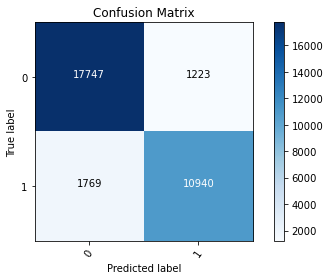

In [51]:
cm = confusion_matrix(Y_test, y_pred)

cm_plot_label =[0, 1]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Matrix')

#### Monetary loss

- False Positive or classifying the data as true when its false costs the client 100 dollars 
- False Negative or classifying the data as false when it is true costs the client 250 dollars

In [52]:
total_nn = Y_test.count()
loss_nn = 100 * cm[0,1] +  250 * cm[1,0]
loss_nn

print(" Cost per prediction: $", loss_nn/total_nn )

 Cost per prediction: $ 17.82095394425329


#### Neural Network Model

In [53]:
my_model = tf.keras.Model()

In [54]:
layer_zero = tf.keras.Input(shape=(67,))
layer1 = tf.keras.layers.Dense(256, activation='swish')(layer_zero)
layer1_bn = tf.keras.layers.BatchNormalization()(layer1)
layer1_do = tf.keras.layers.Dropout(0.2)(layer1_bn)
layer2 = tf.keras.layers.Dense(128, activation='swish')(layer1_do)
layer2_bn = tf.keras.layers.BatchNormalization()(layer2)
layer2_do = tf.keras.layers.Dropout(0.2)(layer2_bn)
layer3 = tf.keras.layers.Dense(256, activation='swish')(layer2_do)
layer3_do = tf.keras.layers.Dropout(0.2)(layer3)
layer4 = tf.keras.layers.Dense(128, activation='swish')(layer3_do)
layer4_do = tf.keras.layers.Dropout(0.2)(layer4)
layer5 = tf.keras.layers.Dense(2, activation='sigmoid')(layer4_do)

my_model = tf.keras.Model(inputs=layer_zero, outputs=layer5)

In [55]:
my_model.compile(optimizer=Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
safety = EarlyStopping(monitor='val_loss', patience=4, min_delta=2e-4)

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=1234)

In [56]:
y_train = y_train.astype(int)
counts = np.bincount(y_train)
weight_for_0 = counts[0] / (counts[0] + counts[1])
weight_for_1 = counts[1] / (counts[0] + counts[1])
class_weight = {0: weight_for_0, 1: weight_for_1}

In [57]:
class_weight

{0: 0.5988063529643879, 1: 0.4011936470356121}

In [58]:
tb = TensorBoard(log_dir = f"logs\\(time))")
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 26164), started 1 day, 13:24:59 ago. (Use '!kill 26164' to kill it.)

In [59]:
my_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 67)]              0         
                                                                 
 dense (Dense)               (None, 256)               17408     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                           

In [60]:
nn_history = my_model.fit(x_train, y_train, 
                 validation_data=(x_val, y_val),
                 callbacks=[tb, safety],
       #          class_weight=class_weight,
                 epochs=50, batch_size=256)

Epoch 1/50
396/396 [==============================] - 7s 14ms/step - loss: 0.3788 - accuracy: 0.8275 - val_loss: 0.2439 - val_accuracy: 0.9010
Epoch 2/50
396/396 [==============================] - 5s 13ms/step - loss: 0.2508 - accuracy: 0.8984 - val_loss: 0.1907 - val_accuracy: 0.9266
Epoch 3/50
396/396 [==============================] - 5s 14ms/step - loss: 0.2067 - accuracy: 0.9195 - val_loss: 0.1636 - val_accuracy: 0.9395
Epoch 4/50
396/396 [==============================] - 6s 15ms/step - loss: 0.1840 - accuracy: 0.9302 - val_loss: 0.1497 - val_accuracy: 0.9443
Epoch 5/50
396/396 [==============================] - 4s 10ms/step - loss: 0.1676 - accuracy: 0.9371 - val_loss: 0.1355 - val_accuracy: 0.9531
Epoch 6/50
396/396 [==============================] - 6s 16ms/step - loss: 0.1586 - accuracy: 0.9413 - val_loss: 0.1283 - val_accuracy: 0.9548
Epoch 7/50
396/396 [==============================] - 6s 14ms/step - loss: 0.1495 - accuracy: 0.9452 - val_loss: 0.1217 - val_accuracy: 0.9578

#### Model Evaluation

<AxesSubplot:>

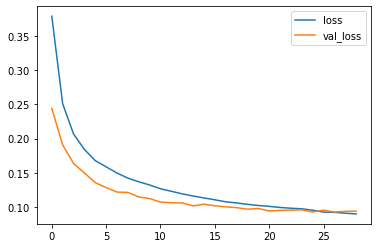

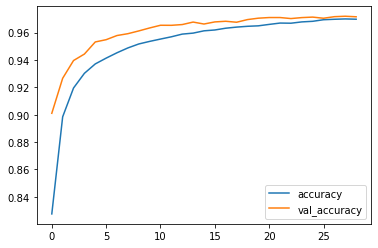

In [61]:
history_df = pd.DataFrame(nn_history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(nn_history.history)
history_df[['accuracy', 'val_accuracy']].plot()

In [62]:
y_pred=my_model.predict(X_test)

In [63]:
y_pred

array([[0.9883237 , 0.08309665],
       [0.4669117 , 0.35375822],
       [0.03649873, 0.93049836],
       ...,
       [0.60981214, 0.3746462 ],
       [0.02434677, 0.9450295 ],
       [0.82641757, 0.11900985]], dtype=float32)

In [64]:
print(classification_report(Y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18970
           1       0.97      0.96      0.96     12709

    accuracy                           0.97     31679
   macro avg       0.97      0.97      0.97     31679
weighted avg       0.97      0.97      0.97     31679



[[18540   430]
 [  461 12248]]


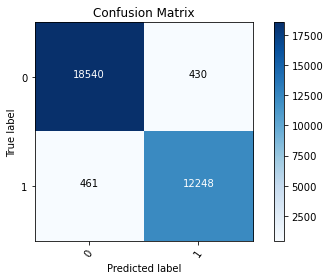

In [65]:
cm = confusion_matrix(Y_test, np.argmax(y_pred, axis=1))

cm_plot_label =[0, 1]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Matrix')

#### Monetary loss

- False Positive or classifying the data as true when its false costs the client 100 dollars 
- False Negative or classifying the data as false when it is true costs the client 250 dollars

In [66]:
total_nn = Y_test.count()
loss_nn = 100 * cm[0,1] +  250 * cm[1,0]
loss_nn

print(" Cost per prediction: $", loss_nn/total_nn )

 Cost per prediction: $ 4.995422835316772


## Model Evaluation
<p>
    <b>Performance Vs Monetary Loss </b>
<table align="left">
    
<tr>
    <th> Model  </th>    
    <th> Accuracy </th>        
    <th> Precision </th>            
    <th> Recall  </th>    
    <th> F1 Score </th>            
    <th> Loss per Prediction in dollars </th>            
</tr>    
<tr>
    <td> Logistic Regression</td>    
    <td> 0.71 </td>    
    <td> 0.70</td>    
    <td> 0.71</td>    
    <td> 0.70</td>    
    <td> 48.25</td>    
</tr>    
<tr>
    <td> Random Forest </td>    
    <td> 0.89</td>    
    <td> 0.89</td>    
    <td> 0.89</td>    
    <td> 0.89</td>    
    <td> 18.18 </td>    
</tr>  
<tr>
    <td> XG Boost </td>    
    <td> 0.91</td>    
    <td> 0.90</td>    
    <td> 0.90</td>    
    <td> 0.90</td>    
    <td> 17.82 </td>    
</tr> 

<tr>
    <td> Neural Network</td>    
    <td> 0.97</td>    
    <td> 0.97</td>    
    <td> 0.97</td>    
    <td> 0.97</td>    
    <td> 4.99 </td>    
</tr>    
</table>
</p>        